# TCC Pós Graduação Ciência de Dados e Big Data
### Interpretação dos resultados

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from wordcloud import WordCloud

import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
%matplotlib inline
sns.set_theme(style="darkgrid")

DIR_DATASET = r'/Users/dev-rocks/Documents/TCC - Data Science e Big Data/Projeto/datasets/'

colunas = ['id','siglaTipo','descricaoTipo','anoDataset']

dfProposicoes = pd.read_csv(f'{DIR_DATASET}proposicoes.csv', sep=';', low_memory=False,usecols=colunas)
dfProposicoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126398 entries, 0 to 126397
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             126398 non-null  int64 
 1   siglaTipo      126398 non-null  object
 2   descricaoTipo  126398 non-null  object
 3   anoDataset     126398 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 3.9+ MB


In [5]:
dfClassificacao = pd.read_csv(f'{DIR_DATASET}classificacaoFinal.csv', sep=';', low_memory=False)
dfClassificacao

,id,tema,predicao
0,2190174,Processo Legislativo e Atuação Parlamentar,True
1,2190174,Trabalho e Emprego,True
2,2190289,Direito Constitucional,True
3,2190289,Homenagens e Datas Comemorativas,True
4,2190289,Processo Legislativo e Atuação Parlamentar,True
...,...,...,...
441660,2313739,Finanças Públicas e Orçamento,False
441661,2313739,"Viação, Transporte e Mobilidade",False
441662,2313740,"Energia, Recursos Hídricos e Minerais",False
441663,2313740,Finanças Públicas e Orçamento,False


In [4]:
df = pd.merge(dfProposicoes,dfClassificacao,left_on='id', right_on='id')
df[['id']].astype('str').describe()

,id
count,441665
unique,121220
top,2300849
freq,22


In [15]:
dfStopWords = pd.read_csv(f'{DIR_DATASET}stop_words.csv', usecols=['stop_words']) \
                .replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["", ""])

listaStopWords = dfStopWords['stop_words'].values.tolist()

texto = ' '.join([tokens for tokens in df['tema'].astype(str)])
len(texto)

11201132

In [ ]:
nuvemPalavras = WordCloud(stopwords=listaStopWords,background_color='black',width=1600,height=800).generate(texto)

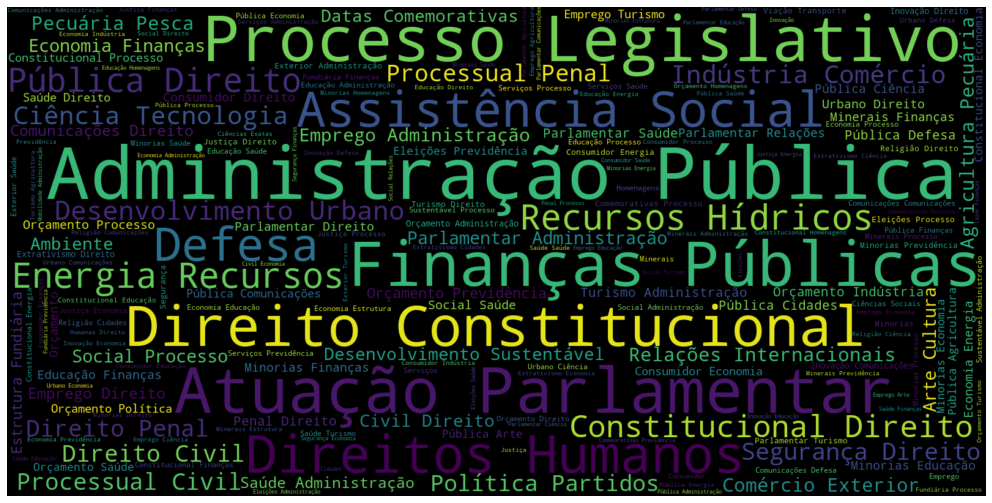

In [20]:
f, ax = plt.subplots(figsize=(18, 9))

plt.axis('off')
plt.imshow(nuvemPalavras,interpolation='bilinear')
plt.show()

In [116]:
dfResumoPorTema = df.groupby(['tema'], as_index=False)['id'].count()
dfResumoPorTema = dfResumoPorTema.sort_values(by='id',ascending=False).rename(columns={'id':'qtd'},inplace=False)

dfResumoPorTema

,tema,qtd
0,Administração Pública,44256
26,Processo Legislativo e Atuação Parlamentar,33424
20,Finanças Públicas e Orçamento,32142
10,Direito Constitucional,25871
28,Saúde,24797
29,Trabalho e Emprego,24542
14,Direitos Humanos e Minorias,22310
15,Economia,20846
25,Previdência e Assistência Social,19574
16,Educação,15541


In [117]:
dfResumoPorTema.head(10)

,tema,qtd
0,Administração Pública,44256
26,Processo Legislativo e Atuação Parlamentar,33424
20,Finanças Públicas e Orçamento,32142
10,Direito Constitucional,25871
28,Saúde,24797
29,Trabalho e Emprego,24542
14,Direitos Humanos e Minorias,22310
15,Economia,20846
25,Previdência e Assistência Social,19574
16,Educação,15541


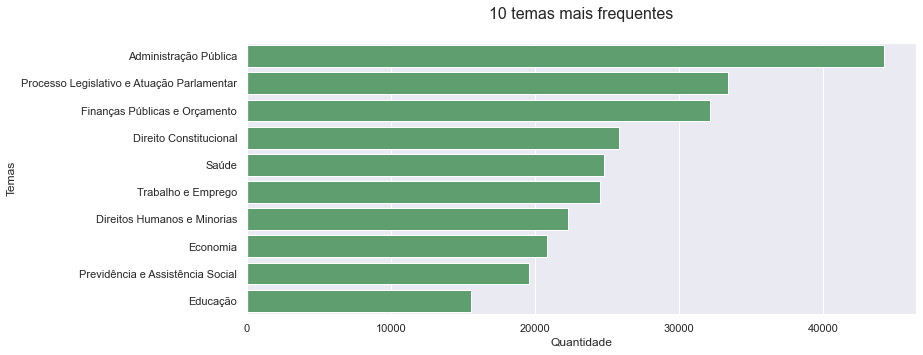

In [162]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='qtd',y='tema',data=dfResumoPorTema.head(10),color='g')

ax.set_title('10 temas mais frequentes\n',fontsize=16)
ax.set_xlabel('Quantidade')
ax.set_ylabel('Temas')

fig.show()


In [138]:
dfResumoPorTema.tail(10).sort_values(by='qtd')

,tema,qtd
5,Ciências Exatas e da Terra,774
6,Ciências Sociais e Humanas,1480
31,"Viação, Transporte e Mobilidade",2101
18,Esporte e Lazer,2930
19,Estrutura Fundiária,5801
21,Homenagens e Datas Comemorativas,6344
23,Meio Ambiente e Desenvolvimento Sustentável,6465
2,"Arte, Cultura e Religião",6873
1,"Agricultura, Pecuária, Pesca e Extrativismo",7922
27,Relações Internacionais e Comércio Exterior,8089


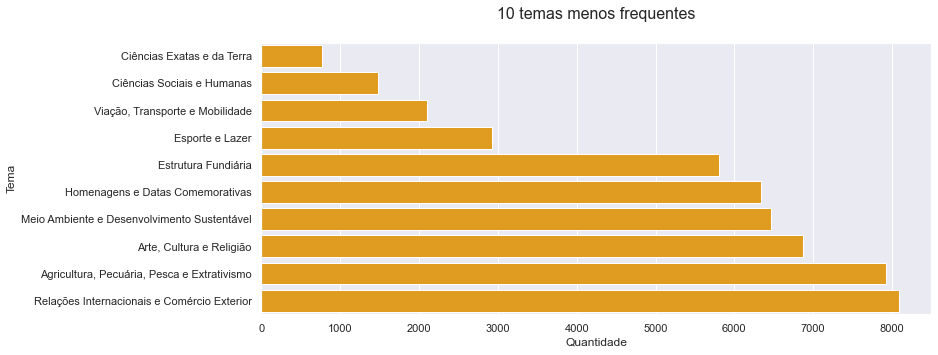

In [161]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(x='qtd',y='tema',data=dfResumoPorTema.tail(10),
                 color='orange',
                 order=dfResumoPorTema.tail(10).sort_values(by='qtd')['tema'])

ax.set_title('10 temas menos frequentes\n', fontsize=16)
ax.set_xlabel('Quantidade')
ax.set_ylabel('Tema')

fig.show()

In [230]:
crosstab = pd.crosstab(index=[df['id']],columns=df['tema'])
temas = list(crosstab.iloc[:,3:-2].columns.values)

crosstab[temas].values
dfHeatmap = pd.DataFrame(data=crosstab[temas].values,columns=temas)
correlacao = dfHeatmap.corr()


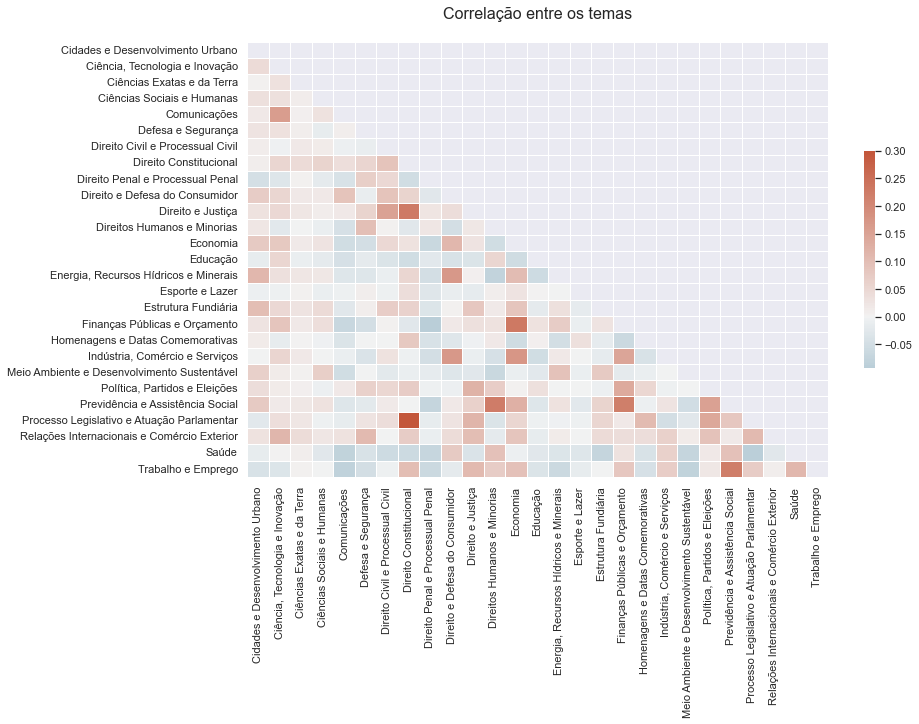

In [238]:

fig, ax = plt.subplots(figsize=(13,8))
mask = np.triu(np.ones_like(correlacao, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlacao,mask=mask,cmap=cmap,annot=False,
            fmt='.0f',vmax=.3, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title('Correlação entre os temas\n', fontsize=16)

plt.show()

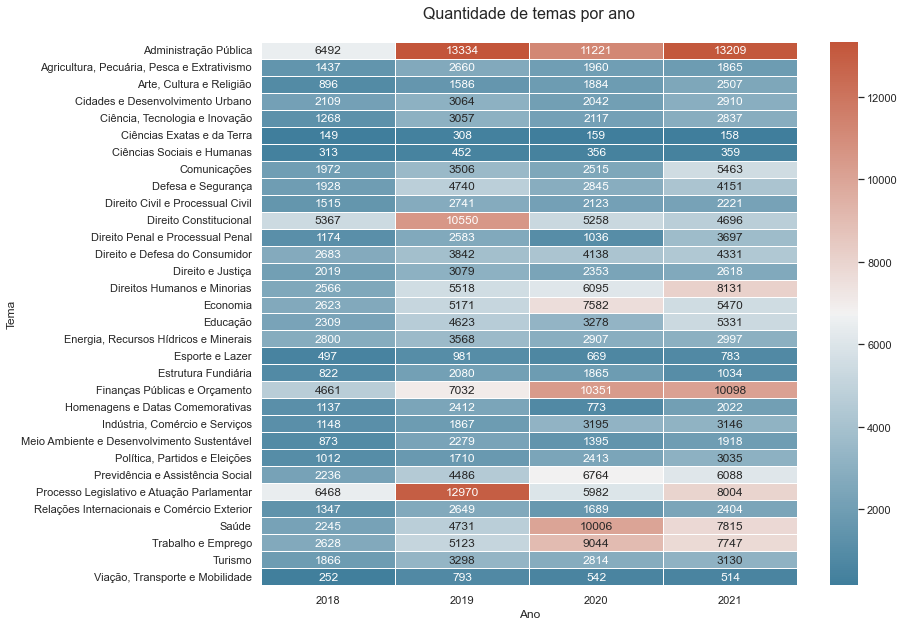

In [241]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(pd.crosstab(index=[df['tema']],
                        columns=df['anoDataset']),
                        annot=True,
                        fmt='d',cmap=cmap,
                        linewidths=.5)

ax.set_title('Quantidade de temas por ano\n', fontsize=16)
ax.set_xlabel('Ano')
ax.set_ylabel('Tema')
plt.show()

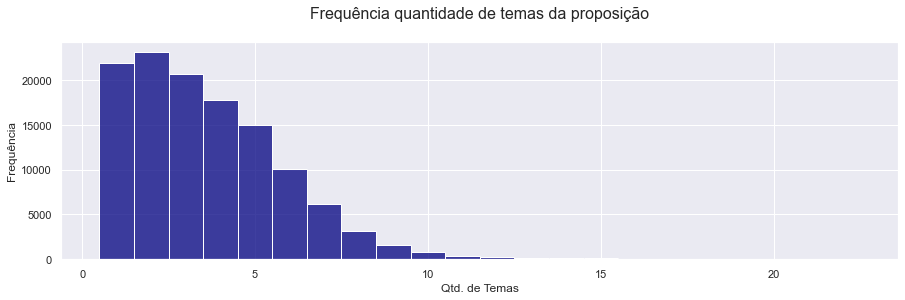

In [335]:
fig, ax = plt.subplots(figsize=(15,4))
sns.histplot(data=crosstab.sum(axis=1), discrete=True,color='navy')

ax.set_title('Frequência quantidade de temas da proposição\n', fontsize=16)
ax.set_xlabel('Qtd. de Temas')
ax.set_ylabel('Frequência')

plt.show()

In [332]:
frequenciaTemas = crosstab.sum(axis=1)
dfTabelaFrequencia = pd.DataFrame(pd.Series(frequenciaTemas.values).value_counts())
dfTabelaFrequencia = dfTabelaFrequencia.set_axis(['frequencia'],axis='columns')
dfTabelaFrequencia['%'] = dfTabelaFrequencia['frequencia']/len(frequenciaTemas)*100
dfTabelaFrequencia[['freqAcumulada','%Acumulado']] = dfTabelaFrequencia.cumsum()


,frequencia,%,freqAcumulada,%Acumulado
2,23087,19.045537,23087,19.045537
1,21842,18.018479,44929,37.064016
3,20639,17.026068,65568,54.090084
4,17742,14.636199,83310,68.726283
5,14951,12.333773,98261,81.060056
6,10107,8.337733,108368,89.397789
7,6140,5.065171,114508,94.462960
8,3178,2.621680,117686,97.084639
9,1574,1.298466,119260,98.383105
10,793,0.654182,120053,99.037288


In [336]:
dfTabelaFrequencia.head(11)

,frequencia,%,freqAcumulada,%Acumulado
2,23087,19.045537,23087,19.045537
1,21842,18.018479,44929,37.064016
3,20639,17.026068,65568,54.090084
4,17742,14.636199,83310,68.726283
5,14951,12.333773,98261,81.060056
6,10107,8.337733,108368,89.397789
7,6140,5.065171,114508,94.462960
8,3178,2.621680,117686,97.084639
9,1574,1.298466,119260,98.383105
10,793,0.654182,120053,99.037288


In [338]:
dfTabelaFrequencia.tail(10)

,frequencia,%,freqAcumulada,%Acumulado
12,270,0.222736,120718,99.585877
13,160,0.131991,120878,99.717868
14,122,0.100643,121000,99.818512
15,113,0.093219,121113,99.911731
16,59,0.048672,121172,99.960403
17,29,0.023923,121201,99.984326
18,9,0.007425,121210,99.991751
20,7,0.005775,121217,99.997525
19,2,0.001650,121219,99.999175
22,1,0.000825,121220,100.000000
